In [4]:
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
from fastai.data.transforms import get_image_files
from fastai.vision.all import *
import PIL
from helper import *

# Load Model

In [3]:
model_ml = SentenceTransformer('clip-ViT-B-32-multilingual-v1')
img_model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.33k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/371 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/transforms.py:280: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


## Load Data

In [25]:
#img_dir = '../../MelvinWevers#9512/train'
img_dir = '../../MelvinWevers#9512/wereldculturen/data'

files = get_image_files(img_dir)
files[0]

Path('../../MelvinWevers#9512/wereldculturen/data/TM-60032727.jpg')

In [16]:
## Depending on the label, we have customized the CLIP prompts.

labels = list(set(files.map(label_func)))
labels = [label.replace('_', ' ') for label in labels]

new_labels = []
for label in labels:
    if label == 'luchtfoto':
        new_labels.append('Een foto genomen vanuit de lucht')
    elif label == 'circus':
        new_labels.append('Een foto genomen in een circus')
    elif label == 'cafe':
        new_labels.append('Een foto genomen in een cafe')
    elif label =='sinterklaas':
        new_labels.append('Een zwart-wit foto van Sinterklaas')
    elif label =='geestelijken':
        new_labels.append('Een zwart-wit foto van priesters')
    elif label == 'groepsportret':
        new_labels.append('Een groepsportret')
    elif label == 'muziek_optreden':
        new_labels.append('Een zwart-wit foto van een optreden')
    elif label == 'schaken_dammen':
        new_labels.append('Een zwart-wit foto van een schaakwedstrijd')
    elif label == 'akker':
        new_labels.append('Een zwart-wit foto van het platteland')
    elif label == 'bakker':
        new_labels.append('Een zwart-wit foto van een bakkerij')
    elif label == 'slagerij':
        new_labels.append('Een zwart-wit foto van een slagerij')
    elif label == 'autorace':
        new_labels.append('Een zwart-wit foto van een race')
    elif label == 'groepsportret':
        new_labels.append('Een zwart-wit portret met meerdere mensen')
    elif label == 'portret':
        new_labels.append('Een zwart-wit foto van een persoon')
    elif label == 'basketball':
        new_labels.append('Een zwart-wit foto van basketball')
    elif label == 'hardlopen':
        new_labels.append('Een zwart-wit foto van hardlopen')
    elif label == 'gymnastiek':
        new_labels.append('Een zwart-wit foto van gymnastiek')
    elif label == 'cricket':
        new_labels.append('Een zwart-wit foto van cricket')
    elif label == 'voetbal':
        new_labels.append('Een zwart-wit foto van een voetbalwedstrijd')
    elif label == 'voetbal':
        new_labels.append('Een zwart-wit foto van volleyball')
    elif label == 'voetbal_team':
        new_labels.append('Een zwart-wit foto van een voetbalteam')
    elif label == 'hockey':
        new_labels.append('Een zwart-wit foto van hockey')
    elif label == 'boten':
        new_labels.append('Een zwart-wit foto van een boot')
    elif label == 'kade':
        new_labels.append('Een zwart-wit foto van mensen aan een kade')
    elif label == 'bos_park':
        new_labels.append('Een zwart-wit foto van een bos')
    elif label == 'dieren':
        new_labels.append('Een zwart-wit foto van dieren')
    elif label == 'wielrennen':
        new_labels.append('Een zwart-wit foto van wielrennen')
    elif label == 'kerk_binnen':
        new_labels.append('Een zwart-wit foto genomen in een kerk')
    elif label == 'keuken':
        new_labels.append('Een zwart-wit foto genomen in een keuken')
    elif label == 'fietsen':
        new_labels.append('Een zwart-wit foto van fietsende mensen')
    elif label == 'roeien':
        new_labels.append('Een zwart-wit foto van roeien')
    elif label == 'waterweg':
        new_labels.append('Een zwart-wit foto van een sloot')
    elif label == 'vijver_plas':
        new_labels.append('Een zwart-wit foto van een plas')
    elif label == 'winkel_binnen':
        new_labels.append('Een zwart-wit foto genomen in een winkel')
    elif label == 'bus_truck':
        new_labels.append('Een zwart-wit foto van een bus')
    elif label == 'ongeluk_brancard':
        new_labels.append('Een zwart-wit foto van iemand op een brancard')
    elif label == 'bootdek':
        new_labels.append('Een zwart-wit foto van mensen aan boord van een schip')
    elif label == 'optocht':
        new_labels.append('Een zwart-wit foto van praalwagens')
    else:
        new_labels.append(f'Een zwart-wit foto van een {label}')
        


In [26]:
Path.BASE_PATH = Path(img_dir)
Path.BASE_PATH.ls()
path = Path.BASE_PATH


dblock = DataBlock(get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path)
dsets.train[0]

(Path('TM-20020964.jpg'), 'data')

In [30]:
#new_labels = ['een kwart slag gedraaid', 'correcte orientatie', 'op de kop']

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# select specific images
imgs = [] 
for index, img in enumerate(dsets.train):
    #if img[1] == 'woonwijk':
        imgs.append(index)
        
    

### Preview Image

../../MelvinWevers#9512/wereldculturen/data/TM-60015156.jpg
['Man' 'Militair' 'Groep']


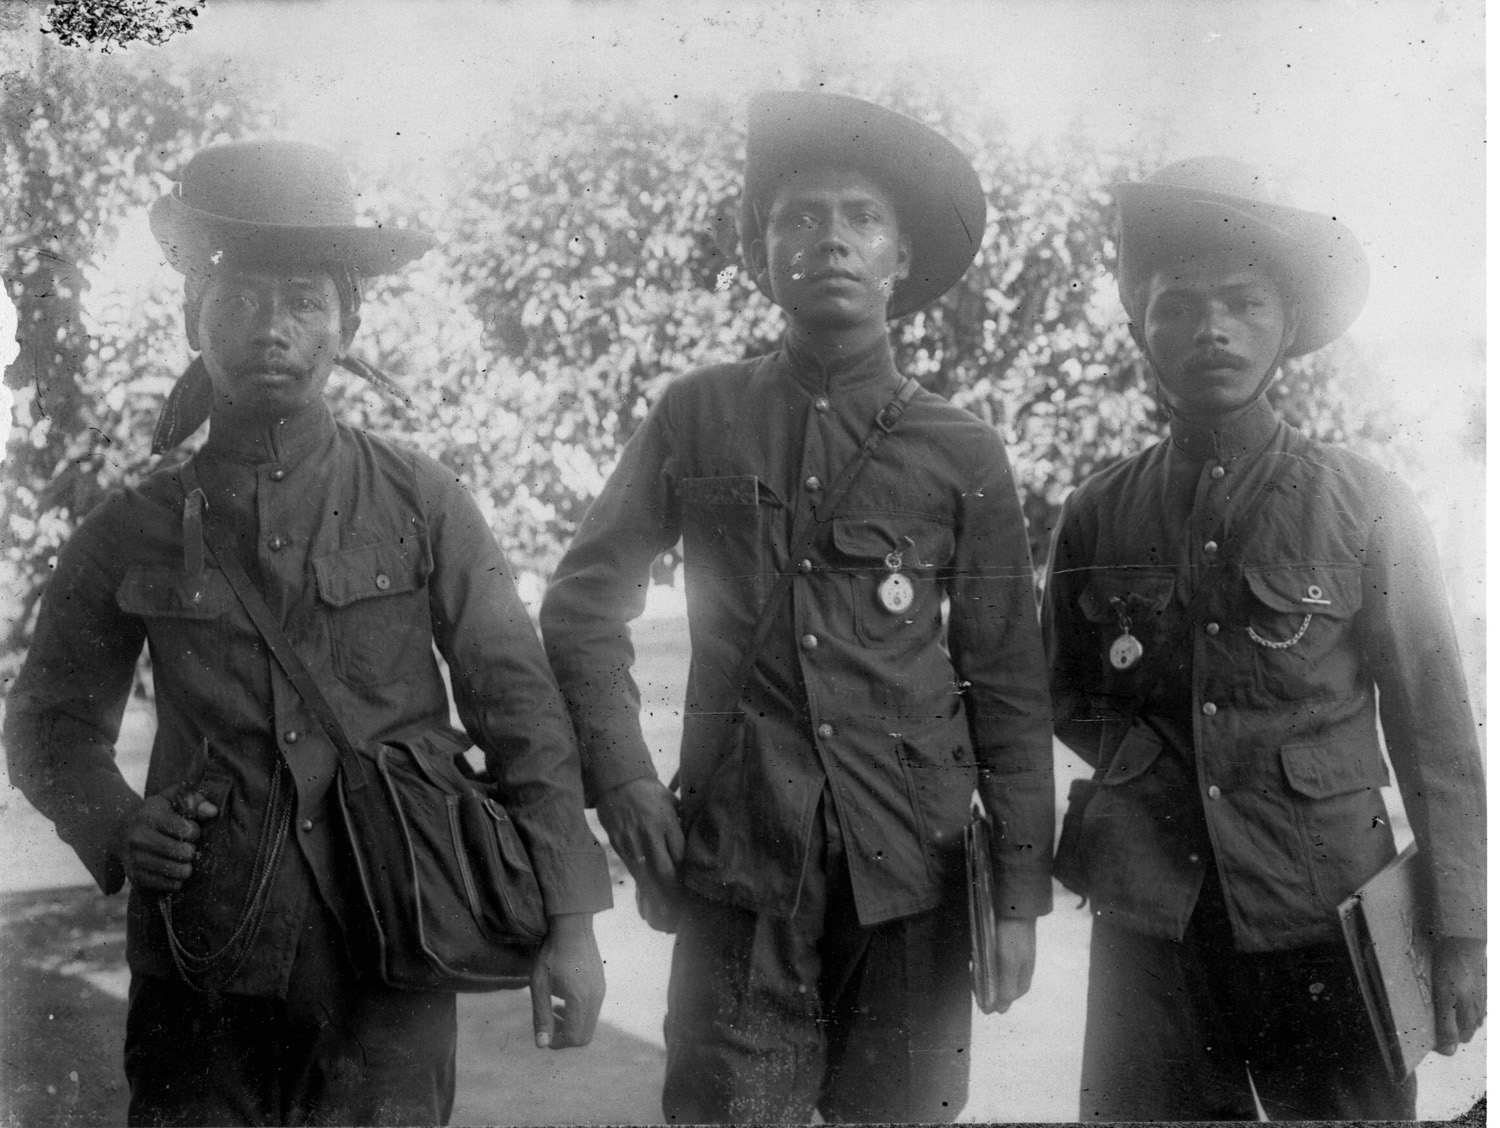

In [105]:
#selection = random.choice(imgs)

image, label = dsets.train[10]
print(image)
img_name = image.stem + '.jpg'
print(df2[df2['FileName'] == img_name]['Term'].values)
PIL.Image.open(image).convert('RGB')

In [110]:
# Calculate features
with torch.no_grad():
    image_features = img_model.encode([Image.open(image)], batch_size=1, show_progress_bar=True, convert_to_tensor=True)
    text_features = model_ml.encode(new_labels, convert_to_tensor=True, show_progress_bar=True)
    

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{labels[index]:>16s}: {100 * value.item():.2f}%")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Top predictions:

een zwart-wit foto van Indische Oceaan: 17.32%
een zwart-wit foto van constructies religieus/ritueel: 12.74%
een zwart-wit foto van Europees: 11.01%
een zwart-wit foto van Militair: 10.34%
een zwart-wit foto van Manggarai: 7.13%


In [28]:
image_path = '../../MelvinWevers#9512/train2/NL-HlmNHA_1478_00629K05_06.jpg'
#PIL.Image.open(image_path).convert('RGB')


In [ ]:
top1 = 0.0
top5 = 0.0 
counter = 0

correct = []
pred_1 = []
pred_5 = []



with torch.no_grad():
    text_features = model_ml.encode(new_labels, convert_to_tensor=True, show_progress_bar=False)
    for image, label in dsets.train:
        if counter % 100 == 0:
            print(counter)
        image_features = img_model.encode([Image.open(image)], batch_size=128, convert_to_tensor=True)
        
        # Pick the top 5 most similar labels for the image
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        values, indices = similarity[0].topk(5)
        labels_ = [labels[i] for i in indices]
        
        if labels_[0] == label:
            top1 += 1.0
        if label in labels_:
            top5 += 1.0
            
        correct.append(label)
        pred_1.append(labels_[0])
        pred_5.append(labels_)
        
        counter += 1
            

In [ ]:
print("top1 acc", top1/len(dsets.train))
print("top5 acc", top5/len(dsets.train))

In [ ]:
correct = [label.replace('_', ' ') for label in correct]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(correct, pred_1))

In [1]:
values

NameError: name 'values' is not defined